/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

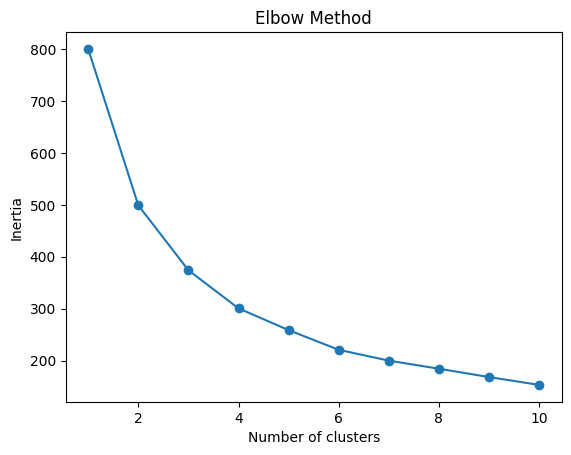

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           TV      Radio  Newspaper      Sales
0  218.410448  19.053731  18.607463  18.482090
1  174.454545  37.556364  56.185455  18.474545
2   66.410256  16.802564  22.742308   9.893590


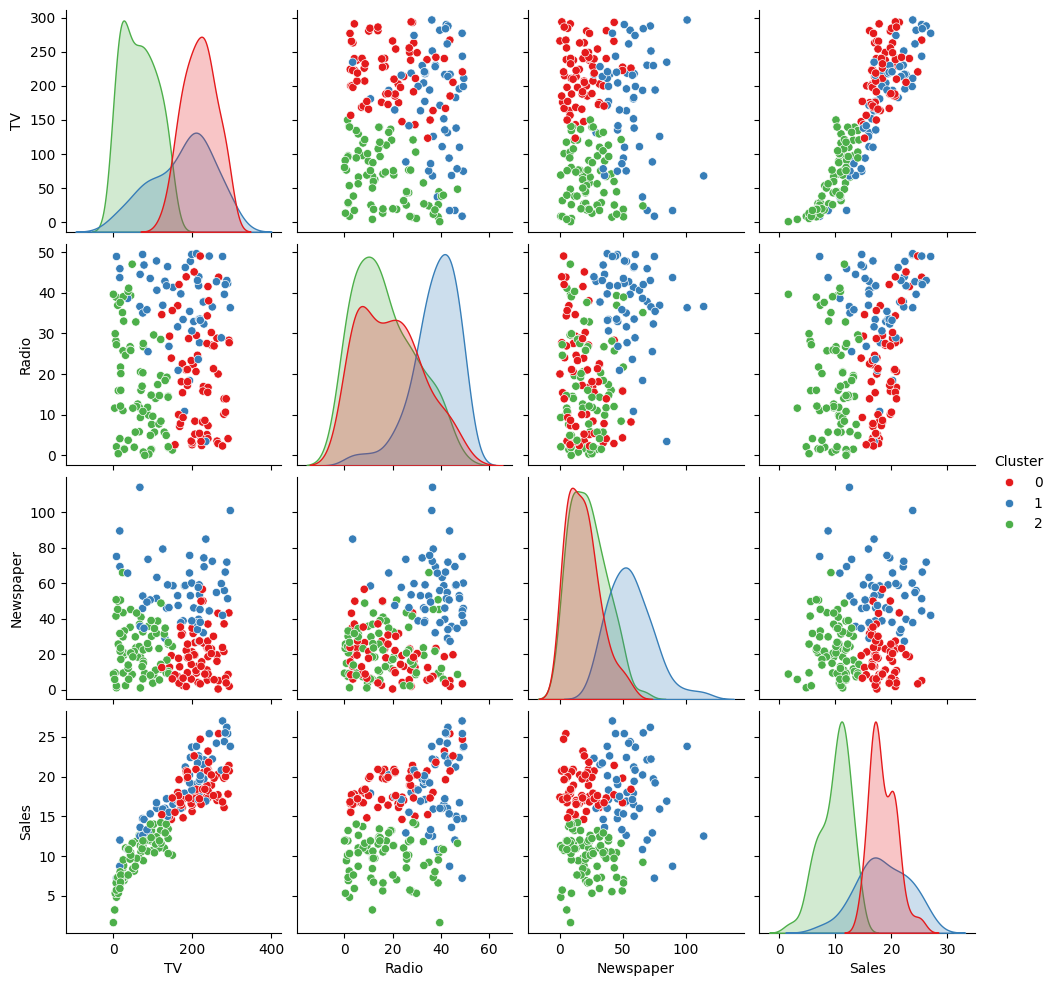

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
customer_data = pd.read_csv('advertising.csv')

# Step 2: Preprocess the data (if needed)
# Drop irrelevant columns or handle missing values

# Step 3: Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Step 4: Determine the optimal number of clusters (K)
# Use elbow method or silhouette score to find the optimal K

# Example of elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Step 5: Apply K-Means clustering
k = 3  # Chosen optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
customer_data['Cluster'] = kmeans.labels_

# Step 6: Analyze the clusters
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=customer_data.columns[:-1]  # Exclude the 'Cluster' column
)
print(cluster_centers)

# Step 7: Visualize the results
sns.pairplot(customer_data, hue='Cluster', palette='Set1')
plt.show()
